In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("1645792390_cep1_dataset.xlsx")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Preliminary Analysis

In [3]:
data.shape

(303, 14)

In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Data Cleaning

In [6]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [7]:
data['ca'].unique()

array([0, 2, 1, 3, 4])

In [8]:
data.loc[data['ca'] == 4,'ca'] = np.NaN

In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        0
target      0
dtype: int64

In [10]:
data = data.fillna(data.median())

In [11]:
data['thal'].unique()

array([1, 2, 3, 0])

In [12]:
data.loc[data['thal'] == 0, 'thal'] = np.NaN

In [13]:
data = data.fillna(data.median())

In [14]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
data.loc[data['thal'] == 3, 'thal'] = 7
data.loc[data['thal'] == 1, 'thal'] = 3
data.loc[data['thal'] == 2, 'thal'] = 6


In [16]:
data['thal'].unique()

array([3., 6., 7.])

In [17]:
data.duplicated().any()

True

In [18]:
all_duplicates = data[data.duplicated(keep=False)]

In [19]:
all_duplicates

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,0.0,6.0,1
164,38,1,2,138,175,0,1,173,0,0.0,2,0.0,6.0,1


In [20]:
data.drop_duplicates(inplace = True)

In [21]:
data.shape

(302, 14)

In [22]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Outliers

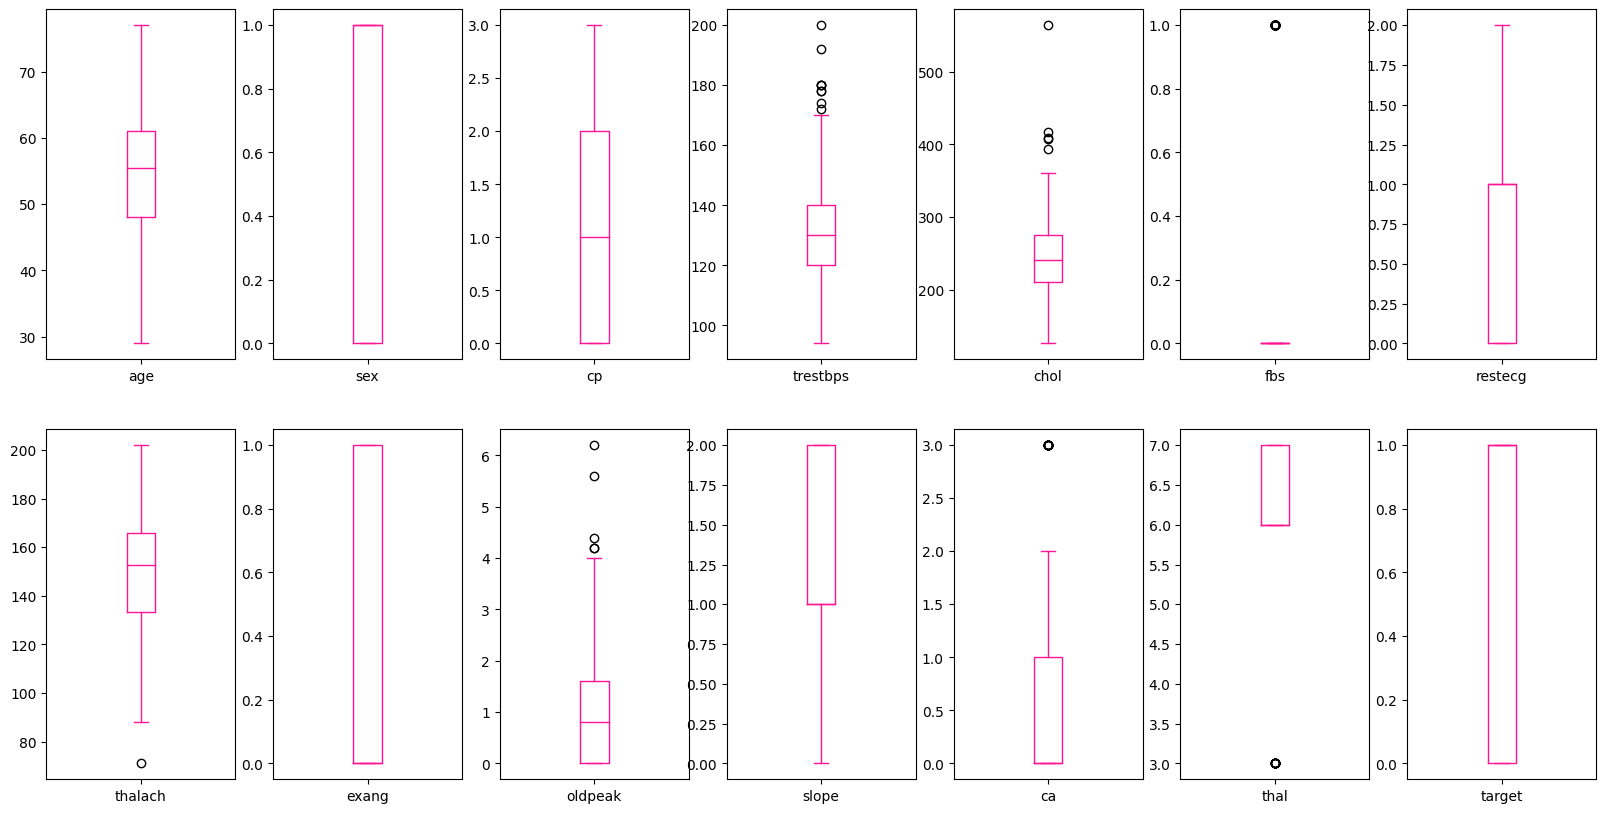

In [24]:
data.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10),
color='deeppink');

In [25]:
# define continuous variable & plot
continous_features = ['age','trestbps','chol','thalach','oldpeak']
def outliers(data_out, drop = False):
    for each_feature in data_out.columns:
        feature_data = data_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            data.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(data[continous_features])

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature thalach, No of Outliers is 1
For the feature oldpeak, No of Outliers is 5


In [26]:
#outliers(data[continous_features], drop = True)

**Prepare a report about the data explaining the distribution of the disease and the related factors.**

Summary Statistics

In [27]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.665563,6.208609,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,0.935142,0.939813,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,6.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,7.000000,1.000000


Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot



In [28]:
data_types = data.dtypes
data_types

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
target        int64
dtype: object

In [29]:
binary_columns = [col for col in data.columns if data[col].nunique() == 2 and data[col].dtype == 'int']
binary_columns


['sex', 'fbs', 'exang', 'target']

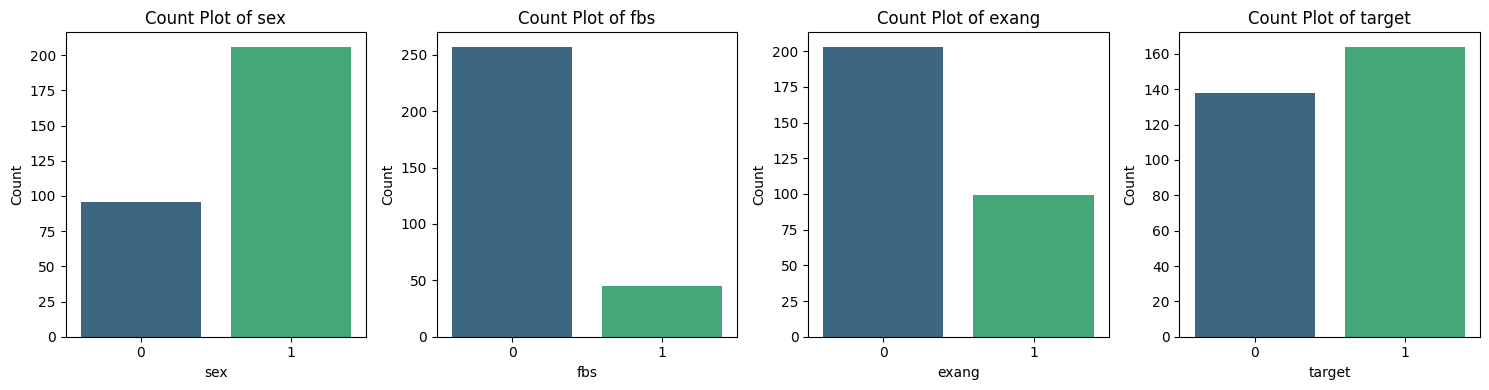

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=len(binary_columns), figsize=(15, 4))

# Explore each binary variable and create count plots
for i, column in enumerate(binary_columns):
    sns.countplot(x=column, data=data, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Count Plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

Study of Occurance of CVD across the Age category

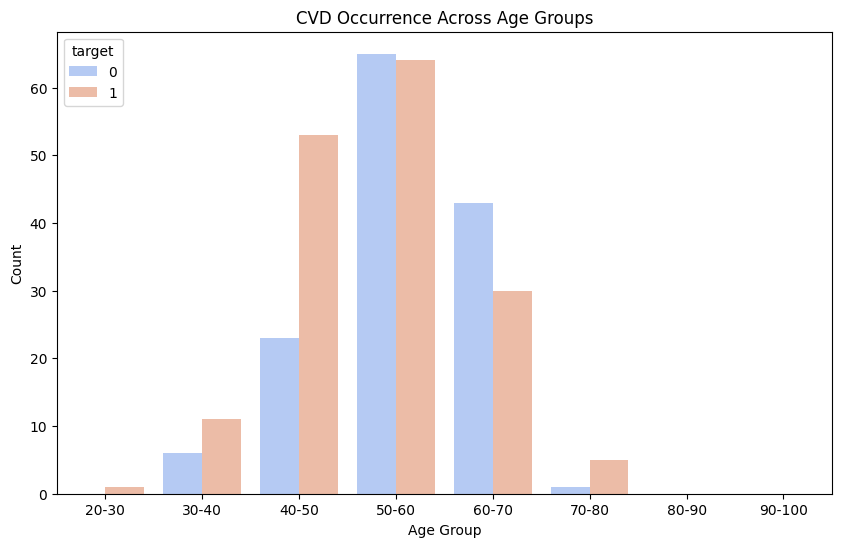

In [31]:
age_bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create a new column 'age_group' based on age bins
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=[f"{start}-{end}" for start, end in zip(age_bins[:-1], age_bins[1:])])

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='target', data=data, palette='coolwarm')
plt.title('CVD Occurrence Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

Study the occurance of CVD over the Sex category

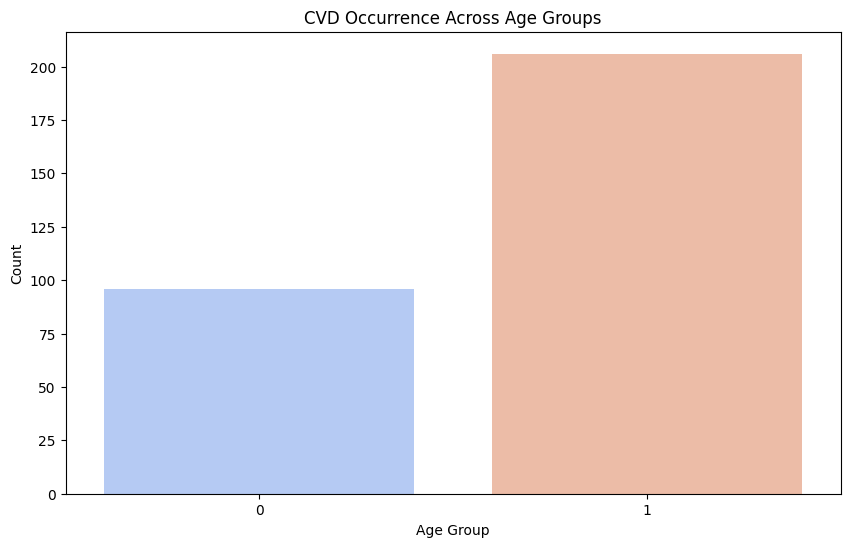

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=data, palette='coolwarm')
plt.title('CVD Occurrence Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

Study if one can detect heart attacks based on anomalies in the resting blood
pressure (trestbps) of a patient

In [33]:
for each_feature in data['trestbps']:
        feature_data = data['trestbps']
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers= feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
outliers

[8, 101, 110, 203, 223, 241, 248, 260, 266]

Describe the relationshil between cholestrol levels and target

In [35]:
data['chol'].max()

564

In [36]:
data['chol'].min()

126

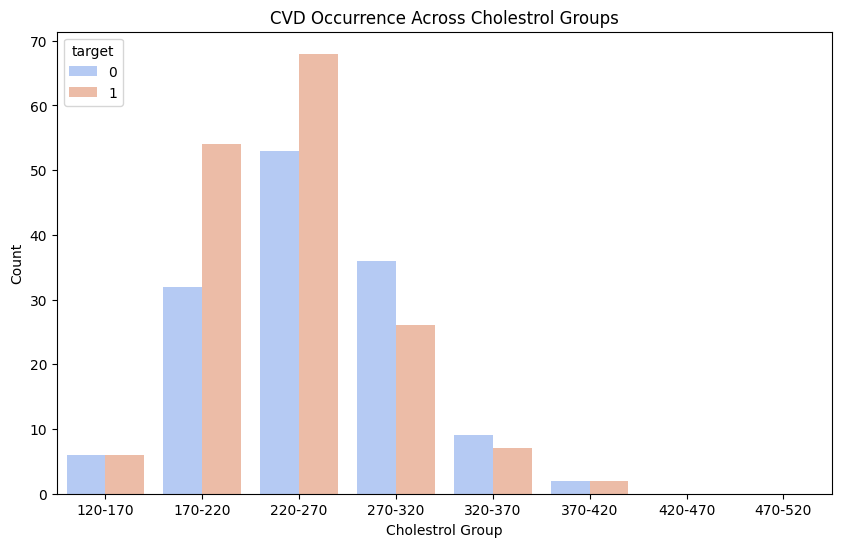

In [37]:
chol_bins = [120, 170, 220, 270,320,370, 420,470, 520]

# Create a new column 'age_group' based on age bins
data['chol_group'] = pd.cut(data['chol'], bins=chol_bins, labels=[f"{start}-{end}" for start, end in zip(chol_bins[:-1], chol_bins[1:])])

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='chol_group', hue='target', data=data, palette='coolwarm')
plt.title('CVD Occurrence Across Cholestrol Groups')
plt.xlabel('Cholestrol Group')
plt.ylabel('Count')
plt.show()

State the relationship between peak excercising and target

In [38]:
data['exang']

0      0
1      0
2      0
3      0
4      1
      ..
298    1
299    0
300    0
301    1
302    0
Name: exang, Length: 302, dtype: int64

<ipython-input-39-75c142fd873b>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = fig.gca());


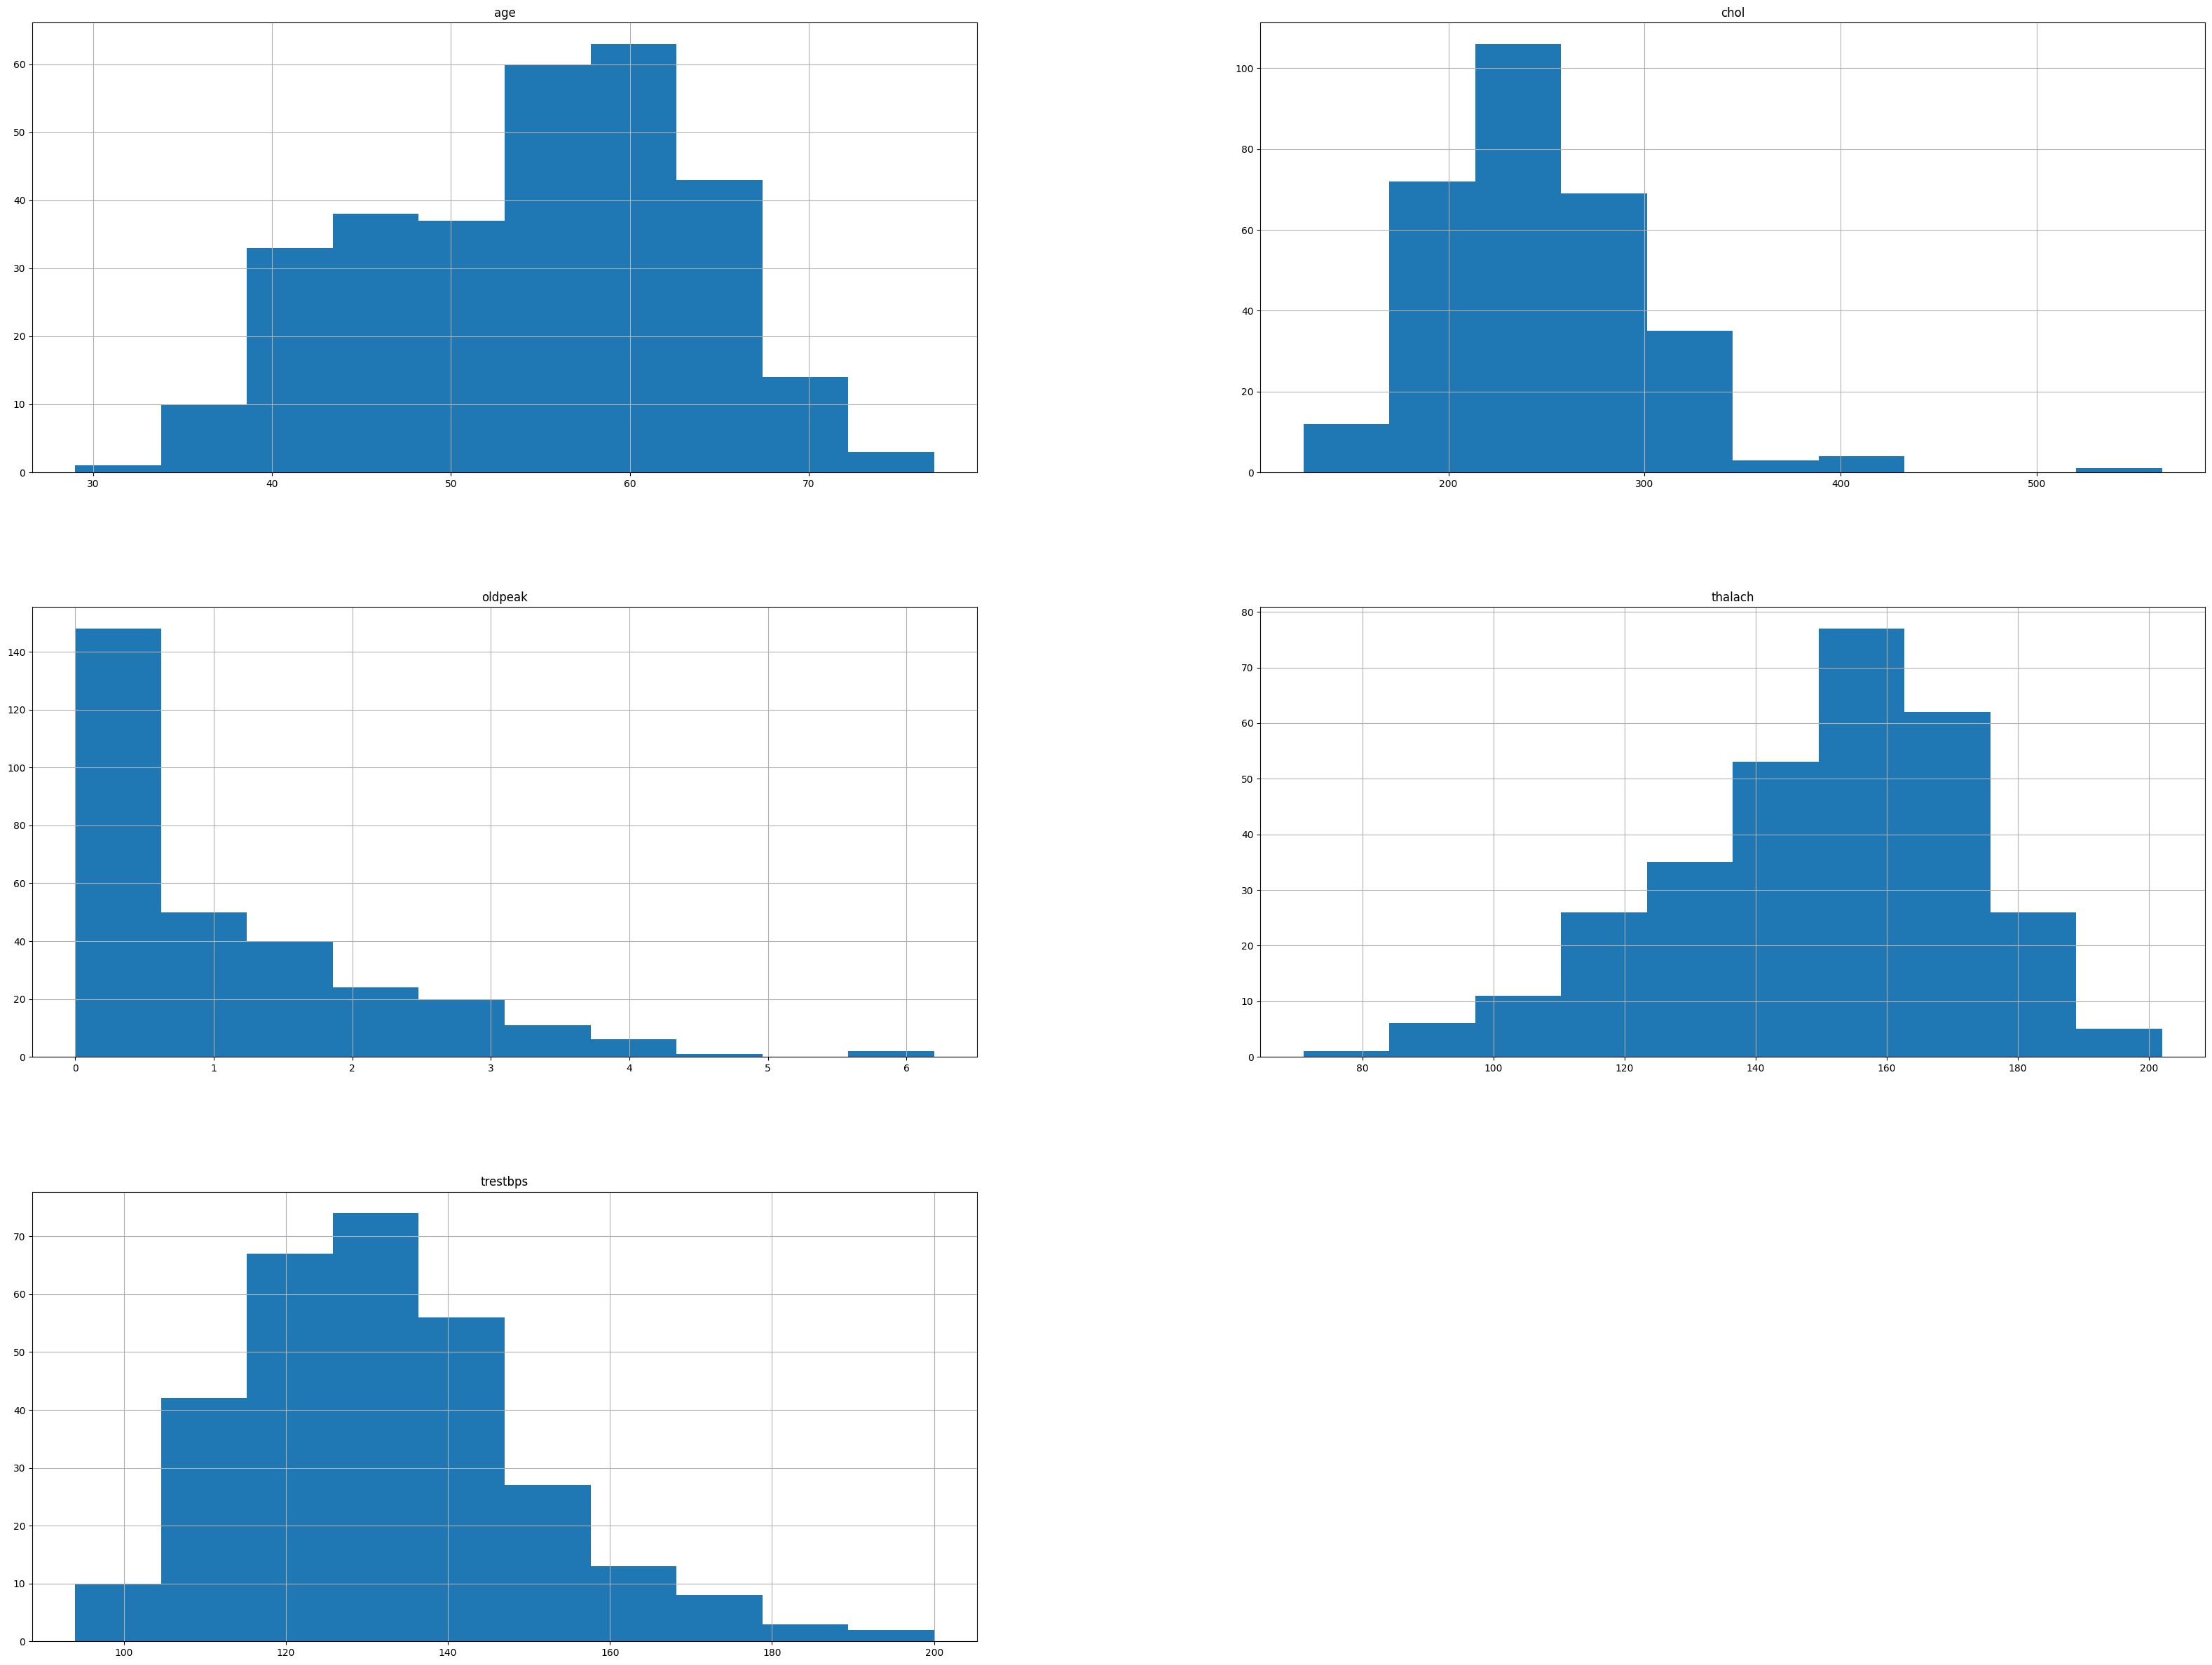

In [39]:
df = data[['age','chol','oldpeak','thalach','trestbps']]
fig = plt.figure(figsize = (40,30))
df.hist(ax = fig.gca());

Heatmap

<ipython-input-40-a7c6339bb54a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True, cmap='coolwarm', linewidths=0.1)


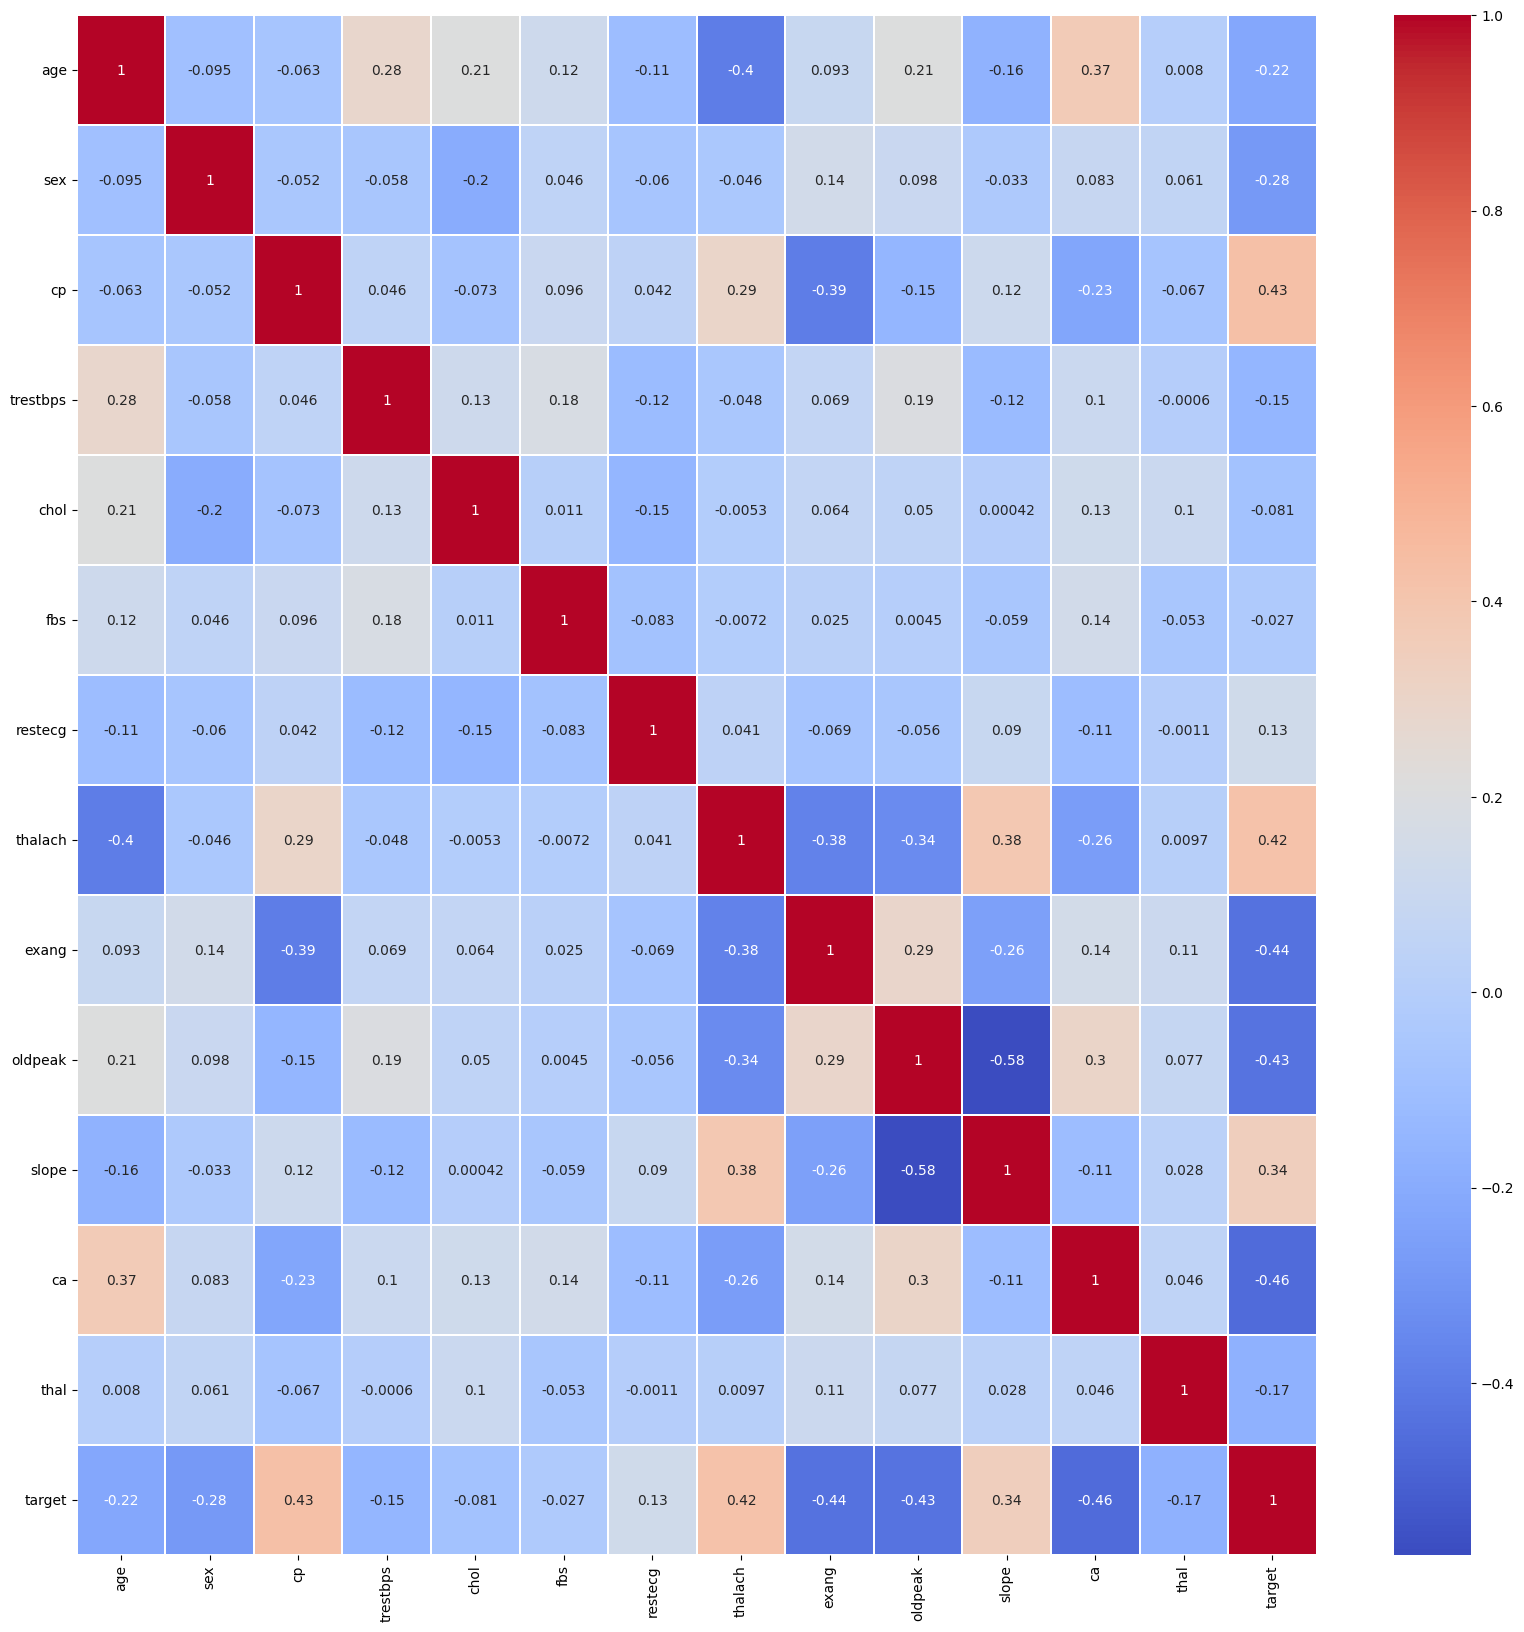

In [40]:
sns.heatmap(data.corr(),annot=True, cmap='coolwarm', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

Pairplot

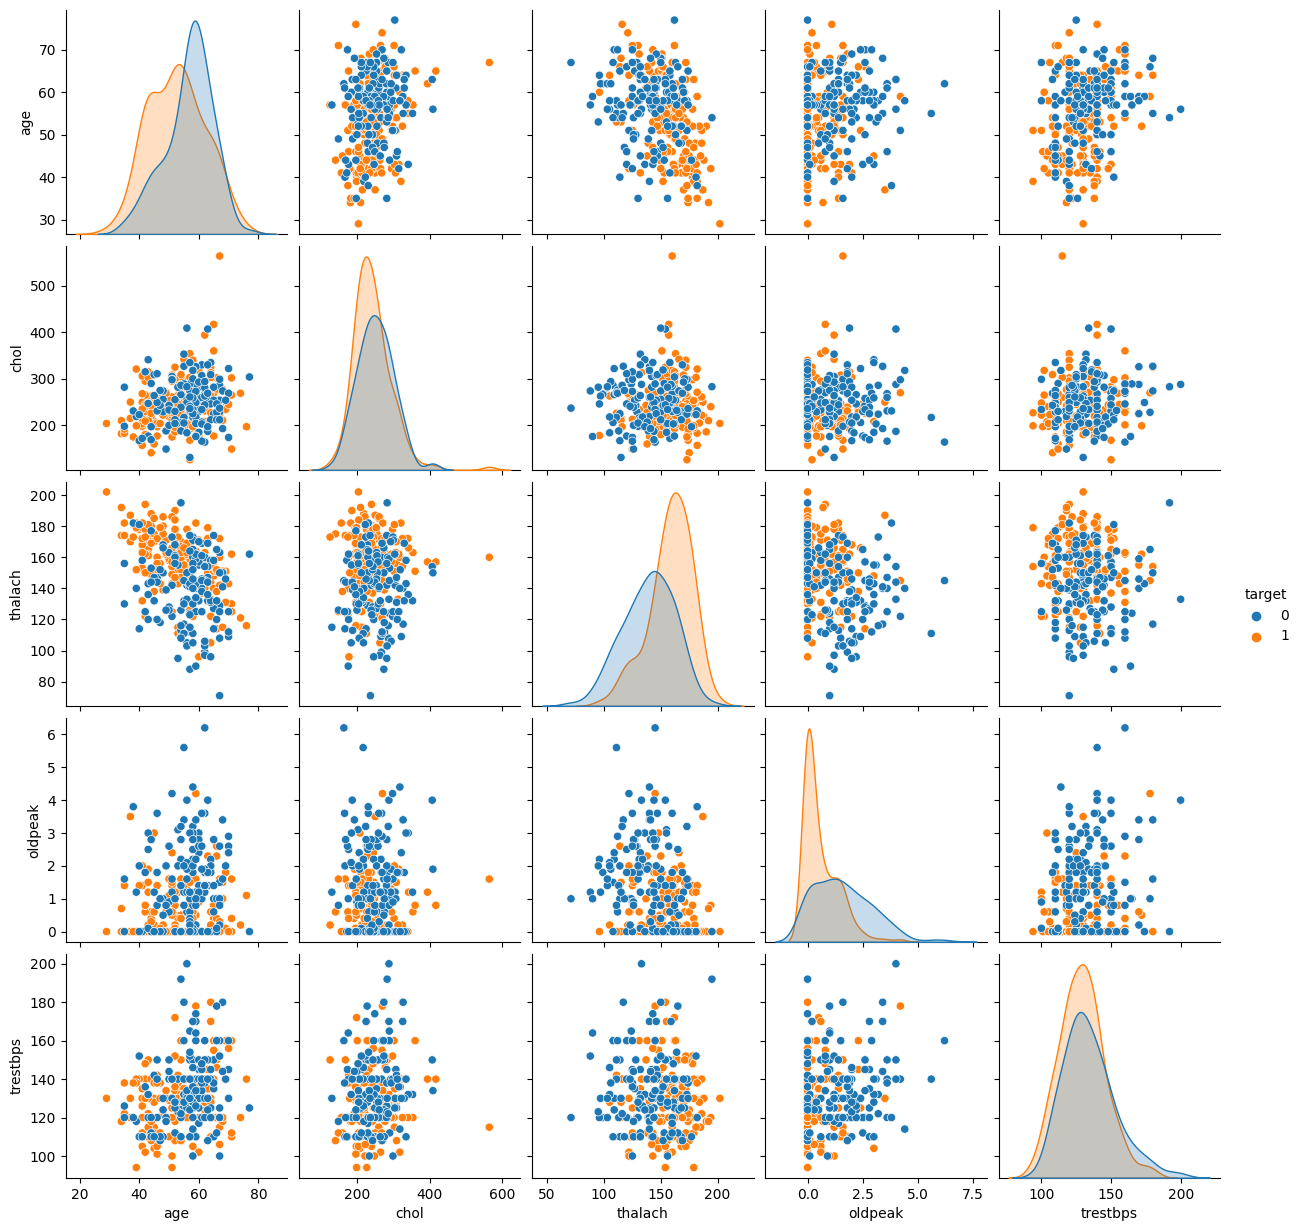

In [41]:
# define continuous variable & plot
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [43]:
# Load your dataset (replace 'your_dataset.csv' with your actual dataset)
# Example assuming the dataset has columns like 'age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', and other features
#df = pd.read_csv('your_dataset.csv')

# Drop missing values for simplicity (handle missing values based on your dataset)
#df = df.dropna()

# Define features and target
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']  # Add other features as needed
target = 'target'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

print("Logistic Regression Results:")
evaluate_model(logreg, X_test, y_test)

print("\nRandom Forest Results:")
evaluate_model(rf, X_test, y_test)

# Correlation Analysis
correlation_matrix = data[features + [target]].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Logistic Regression for Feature Selection
X_train_with_intercept = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_with_intercept)
result = logit_model.fit()

# Display summary including standard errors and p-values
print("\nLogistic Regression Summary:")
print(result.summary())

# Calculate Variance Inflation Factor (VIF) to check for multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF:")
print(vif_data)


Logistic Regression Results:
Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        29
           1       0.77      0.84      0.81        32

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61


Random Forest Results:
Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.69      0.71        29
           1       0.74      0.78      0.76        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61


Correlation Matrix:
               age  trestbps      chol   thalach   oldpeak    target
age       1.000000  0.283121  0.207216 -0.395235  0.206040 -0.221476
trestbps  0.283121  1.000000  0.125256 -0.048023  0.194600